# Effettuare test statistici in Python
Con valutazione dei pvalues per le variabili statistiche più comuni <p>
Valerio Pagliarino - 12.04.20 - Esperimentazioni IB - C.d.L. in Fisica - Università degli Studi di Torino

### Indice:

*   Aspetti generali
*   Test $\chi^2$ di adattamento (o di Pearson)
*   Test z normale
*   Test t di Student
*   Test F di Fisher per il confronto tra varianze




## Aspetti generali
Gli strumenti per lo svolgimento di test statistici in Python sono contenuti nel modulo `scipy.stats`, mentre per la manipolazione dei dati utilizzeremo come di consueto gli array del modulo `numpy` 



In [3]:
import scipy
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt

Analizzeremo le modalità di svolgimento dei test statistici più comuni direttamente in Python, con il vantaggio di poter ricavare più facilmente i <b>pvalues</b> rispetto alle tavole tradizionali. Questi ultimi verranno calcolati attraverso la funzione di probabilità cumulativa, integrale della funzione di densità di probabilità `(pdf, probability density function)` che è generalmente accessibile per tutte le variabili statistiche più comuni come segue: <p>
```
scipy.stats.<variabile>.cdf(X, ...)
```
tra gli argomenti passati alla funzione c'è sempre il valore $X$ che rappresenta l'estremo superiore di integrazione della funzione densità di probabilità oltre agli eventuali gradi di libertà ed altri parametri specifici della variabile utilizzata: <p>
\begin{equation}
 = \int_{-\infty...0}^{X} p.d.f.(x)dx
\end{equation} <p>
Pertanto, per valutare un integrale sulla coda destra, occorrerà calcolare $1-\int p.d.f.(x)dx$ sfruttando la condizione di normalizzazione.
<b>Ecco alcuni esempi di valutazione della funzione di probabilità cumulativa:</b>


In [0]:
x = -1.96
p1 = scipy.stats.norm.cdf(x)  #Integrale sulla coda sinistra sotto la distribuzione normale
p2 = scipy.stats.t.cdf(x, 5)  #Integrale sulla coda sinistra sotto la distribuzione di Student con 5 gradi di libertà

x = 2.01
p3 = 1 - scipy.stats.f.cdf(x, 7, 9)    #Integrale sulla coda destra sotto la distribuzione F di Fisher con 7 e 9 gradi di libertà
p4 = 1 - scipy.stats.chi2.cdf(x, df=4) #Integrale sulla coda destra sotto la distribuzione di chi^2 con 4 gradi di libertà

print("p1 = {} , p2 = {} , p3 = {} , p4 = {}".format(p1, p2, p3, p4))

p1 = 0.024997895148220435 , p2 = 0.05364397625264705 , p3 = 0.1625981298769782 , p4 = 0.7339194927820509


Attraverso l'utilizzo della funzione di probabilità cumulativa è sempre possibile valutare il pvalue. L'elenco delle distribuzioni statistiche disponibili, insieme a molte altre informazioni, è accessibile nella documentazione ufficiale:

*   Distribuzioni continue: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html
*   Distribuzioni discrete: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html

In seguito vedremo alcuni esempi applicativi, considerando i test statistici più comuni


## Test $\chi^2$ di adattamento (o di Pearson)

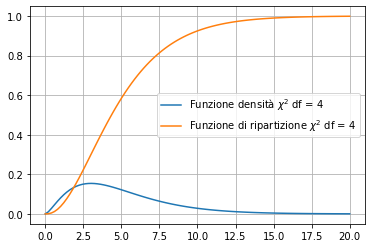

In [0]:
x = np.linspace(0, 20, 100) 
y = scipy.stats.chi2.pdf(x, 5) 
c = scipy.stats.chi2.cdf(x, 5)
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label = 'Funzione densità $\chi^2$ df = 4')
ax.plot(x, c, label = 'Funzione di ripartizione $\chi^2$ df = 4')
ax.legend()
ax.grid()

##### A) Calcolo del pvalue e confronto diretto con $\alpha$ nel test a una coda

In [28]:
#Sia dato il seguente campione di esempio generato in modo casuale:
y    = np.array([2.5, 4.2, 6.8, 7.5, 10.0, 12.2])
x    = np.array([1. , 2.,  3. , 4. , 5.  , 6.  ])
yerr = np.array([.4 , .6, .5  ,.7  , .1  , .4  ])
#E la seguente funzione lineare interpolante:
#  y = a + bx con:
a = 0.61
b = 1.88   # (Dal metodo dei minimi quadrati)

#Definiamo ora la variabile di test chi^2 e assumiamo come ipotesi nulla la compatibilità tra la funzione e i nostri dati
# in questo esempio eseguiremo il test a una coda (coda destra)
chi_2 = 0.
for i in range(y.size):
  chi_2 += ((y[i] - b*x[i] - a)**2) / (yerr[i]**2)

print("chi^2 = ", chi_2)

chi^2 =  2.7115277777777735


$H_0\rightarrow$ La relazione funzionale si adatta ai dati sperimentali

In [29]:
#Cacoliamo l'integrale sotto la funzione densità di probabilità dal valore di chi^2 trovato fino a +infinito
#  con df si indicano i gradi di libertà.
pvalue = 1 - scipy.stats.chi2.cdf(chi_2, df = y.size - 2)
print("pvalue = ", pvalue)

pvalue =  0.6071989118007652


##### B) Calcolo nel test a due code

$H_0\rightarrow$ La relazione funzionale si adatta ai dati sperimentali e l'errore non è sovrastimato

In [30]:
#Nel caso a due code possiamo procedere calcolando gli integrali sulla coda destra e sinistra
# separatamente. Dopo averli moltiplicati per due (metà probabilità sotto ciascuna coda)
# solo uno di essi risulterà accettabile.
pvalueSX = scipy.stats.chi2.cdf(chi_2, df = y.size - 2)
pvalueDX = 1 - scipy.stats.chi2.cdf(chi_2, df = y.size - 2) #Qui sfruttiamo la condizione di normalizzazione
pvalueSX *= 2
pvalueDX *= 2
pvalue = pvalueSX
if (pvalue > 1):
  pvalue = pvalueDX
print("pvalue a due code: ", pvalue)

pvalue a due code:  0.7856021763984694


## Test $z$ normale

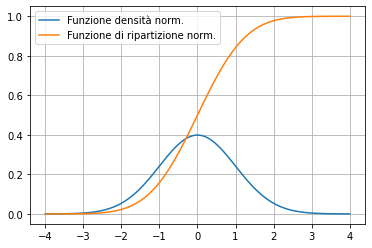

In [0]:
x = np.linspace(-4, 4, 100)
y = scipy.stats.norm.pdf(x)
c = scipy.stats.norm.cdf(x) #La funzione di ripartizione della distribuzione normale è detta anche 'funzione degli errori' o ERF
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label = 'Funzione densità norm.')
ax.plot(x, c, label = 'Funzione di ripartizione norm.')
ax.legend()
ax.grid()

In [0]:
#Sia data la seguente situazione di esempio:
a     = 3.62
a_err = 0.08
b     = 3.21
b_err = 0.09
#  si vuole valutare la compatibilità tra le due misure con errori statistici indipendenti 

$H_0\rightarrow$ I due campioni risultano compatibili

In [30]:
#Definiamo la variabile z di test come:
z = (a-b)/np.sqrt(b_err**2 + a_err**2)

#Nel caso di un test a due code possiamo utilizzare il metodo 'interval' che restituisce i valori critici;
#  il metodo non richiede alfa, bensì il livello di protezione del test 1-alfa.
val_critici = scipy.stats.norm.interval(1-0.05)
print("Passando al metodo 1-0.05 (5%) troviamo gli usuali valori +/- 1.96: ", val_critici)
#Possiamo ora procedere al confronto di z con tali valori

Passando al metodo 1-0.05 (5%) troviamo gli usuali valori +/- 1.96:  (-1.959963984540054, 1.959963984540054)


In [31]:
#Altrimenti è possibile calcolare il pvalue come segue:
pvalue = scipy.stats.norm.cdf(-abs(z)) *2  #abs è il valore assoluto
#abbiamo riportato il valore sulla coda sinistra, sfruttando la simmetria della gaussiana, e poi abbiamo moltiplicato *2 siccome il test è a due code.
print("Variabile di test = {}  pvalue = {}".format(z, pvalue))

Variabile di test = 3.40486467400334  pvalue = 0.0006619684903875203


## Test $t$ di Student

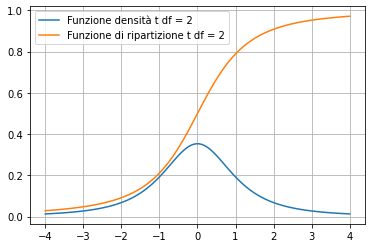

In [0]:
x = np.linspace(-4, 4, 100)
y = scipy.stats.t.pdf(x, 2)
c = scipy.stats.t.cdf(x, 2)
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label = 'Funzione densità t df = 2')
ax.plot(x, c, label = 'Funzione di ripartizione t df = 2')
ax.legend()
ax.grid()

### Variabile $t$ di Student per il confronto tra campioni

$H_0\rightarrow$ I due campioni risultano compatibili

In [0]:
#Siano dati i seguenti campioni di esempio provenienti da un esercizio del corso:
a = np.array([0.117, 0.139, 0.122, 0.139, 0.132])
b = np.array([0.120, 0.127, 0.133, 0.115, 0.137, 0.126])

a_mean = a.mean() 
b_mean = b.mean()
a_var  = a.var(ddof = 1) #Il parametro ddof specifica che la sommatoria degli scarti quadratici per calcolare la varianza andrà divisa per N-1
b_var  = b.var(ddof = 1)
a_num  = a.size
b_num  = b.size

#Calcoliamo la varianza pesata, la variabile di test e i gradi di libertà
S2 = ((a_num-1) * a_var + (b_num-1) * b_var)/(a_num + b_num - 2)
t = (a_mean - b_mean) / np.sqrt(S2/a_num + S2/b_num)
ndof = a_num - 1 + b_num - 1

### Variabile $t$ di Student per il confronto con un valore di riferimento

$H_0\rightarrow$ Il campione è compatibile con il valore di riferimento

In [0]:
#Sia dato il seguente campione proveniente da un esercizio del corso ed un valore di riferimento:
a = np.array([2.2,-0.1, 1.0, 0.2, -1.5, -0.2, -0.3, 0.8, 0.6, -0.5])
ref = 0.
a_var  = a.var(ddof = 1)
a_mean = a.mean()
#calcoliamo la variabile di test
t = (a_mean - ref) / np.sqrt(a_var / a.size)
#calcoliamo i gradi di libertà
ndof = a.size -1

### Variabile $t$ di Student per dati appaiati

$H_0\rightarrow$ Due serie di dati riferite al medesimo campione risultano compatibili (tra la prima e la seconda serie non sono avvenute variazioni significative)

In [0]:
#Siano date le seguenti misurazioni riferite al medesimo campione con variabilità interna, 
#si vuole valutare se un evento accaduto tra le due misurazioni abbia prodotto una variazione significativa dell'osservabile.
a = np.array([14., 8., 3., 20., 18., 9., 12.])
b = np.array([4., 10., 7., 1., 8., 6., 3.])

d = a-b # Costruiamo un nuovo campione 'd' contenente gli scarti tra ciascun elemento in 'a' e in 'b'

d_mean = d.mean() 
d_var  = d.var(ddof = 1) #Il parametro ddof specifica che la sommatoria degli scarti quadratici andrà divisa per N-1
d_num  = d.size

#### Esecuzione del test di Student

In [0]:
#Anche questa volta possiamo sfruttare la 'cdf' (funzione di probabilità cumulativa) per eseguire un test a due code:

pvalue = scipy.stats.t.cdf(-abs(t), df=ndof)  *2 #Anche qui riportiamo il valore sulla coda sinistra sfruttando la simmetria della distribuzione di Student
print("pvalue = ", pvalue)

pvalue =  0.5050114619081207


In [0]:
#Scipy mette a disposizione anche funzioni più specifiche per questo tipo di test:
campioneA = a[0:5] 
campioneB = b[0:5] #slicing del'array di numpy per selezionare solo alcuni elementi

variabile_t, pvalue = scipy.stats.ttest_ind(campioneA, campioneB) #Compatibilità tra campioni, test a due code
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# Il test assume che i campioni abbiano la stessa varianza
# Valido per campioni INDIPENDENTI.

# Per campioni di dati DIPENDENTI si usa invece
variable_t, pvalue = scipy.stats.ttest_rel(campioneA, campioneB)

#Confronto con un valore di riferimento:
variable_t, pvalue = scipy.stats.ttest_1samp(campioneA, ref)



## Test $F$ di Fisher per il confronto tra varianze

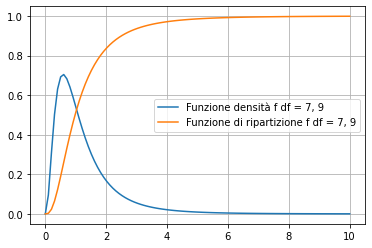

In [0]:
x = np.linspace(0, 10, 100)
y = scipy.stats.f.pdf(x, 7,9)
c = scipy.stats.f.cdf(x, 7,9)
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label = 'Funzione densità f df = 7, 9')
ax.plot(x, c, label = 'Funzione di ripartizione f df = 7, 9')
ax.legend()
ax.grid()

In [17]:
#Si prendano due varianze di esempio:
df1 = 10 - 1
df2 = 8  - 1
var1 = 3.4531
var2 = 3.7142
#Potrebbe trattarsi delle varianze di due campioni, oppure delle varianzeTRA e varianzeENTRO di un test ANOVA

##### Test ad una coda (destra)

$H_0\rightarrow$ Le varianze risultano compatibili <br>
$H_1\rightarrow$ La varianza a numeratore è maggiore di quella a denominatore in modo significativo

In [20]:
#Calcoliamo la variabile F tenendo a numeratore la varianza maggiore tra le due
f = var2 / var1
pvalue = 1 - scipy.stats.f.cdf(f, df2, df1)
print("pvalue da confrontare con alpha (0.05) p = ", pvalue)

pvalue da confrontare con alpha (0.05) p =  0.44851336141851395


##### Test a due code

$H_0\rightarrow$ Le varianze risultano compatibili <br>
$H_1\rightarrow$ La varianza a numeratore presenta differenza significativa rispetto a quella a denominatore

In [25]:
#Calcoliamo la variabile F tenendo a numeratore la varianza maggiore tra le due
f = var2 / var1
pvalue = (1 - scipy.stats.f.cdf(f, df2, df1)) * 2  #Ciascuna coda ha come integrale metà della probabilità totale.
#Siccome abbiamo tenuto a numeratore la varianza maggiore non abbiamo bisogno di calcolare anche il pvalue sinistro per svolgere il test a due code.
print("pvalue da confrontare con alpha (0.05) p = ", pvalue)

pvalue da confrontare con alpha (0.05) p =  0.8970267228370279


<hr>
<p>
Questo notebook non esaurisce minimamente la trattazione di test statistici in Python, nemmeno per quanto riguarda i più comuni. Si raccomanda di usare questi esempi come supporto all'analisi dati <u>sempre con spirito critico.</u><p><p>Corso di Esperimentazioni I B, 1 aprile 2020